In [16]:
import pandas as pd
import numpy as np

import random
from datetime import datetime, timedelta

import random
from datetime import date, datetime, timedelta

import random
from datetime import datetime, timedelta

In [17]:
df = pd.read_csv('Online_Retail.csv', encoding='utf-8', sep=',')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/10 8:26,3.39,17850.0,United Kingdom


From 2025-01-11 to 2025-02-09


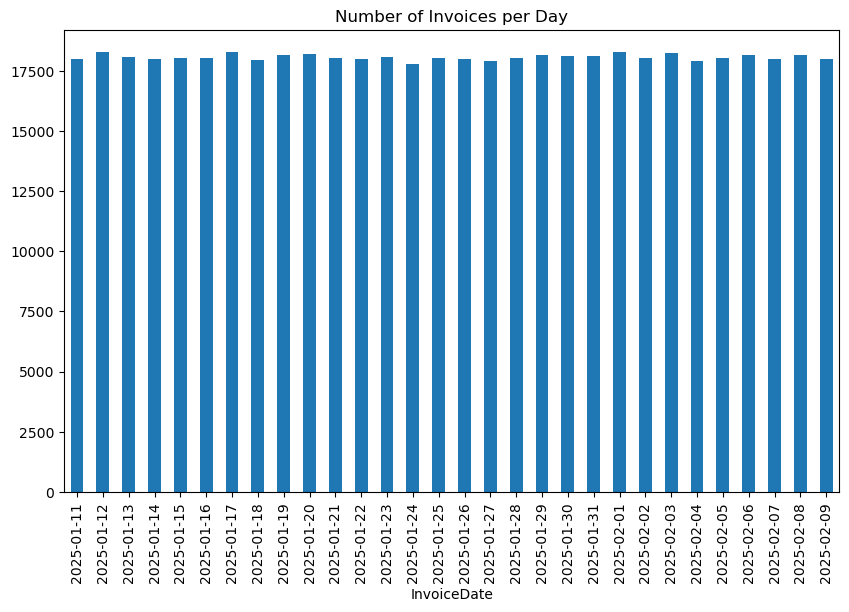

In [18]:
def random_datetimes(start_date: datetime.date, end_date:datetime.date, n:int):
    """
    Generate n random datetimes between start_date and end_date.
    Dates are sampled uniformly, then random times are added.
    
    :param start_date_str: The start date as string 'yyyy-mm-dd' (inclusive)
    :param end_date_str: The end date as string 'yyyy-mm-dd' (inclusive)
    :param n: Number of random datetimes to generate
    :return: List of random datetime objects
    """
    
    date_range = (end_date - start_date).days + 1  # +1 to include end_date
    random_datetimes = []
    
    for _ in range(n):
        # Sample a random date
        random_days = random.randint(0, date_range - 1)
        random_date = start_date + timedelta(days=random_days)
        
        # Generate random time
        random_hour = random.randint(0, 23)
        random_minute = random.randint(0, 59)
        random_second = random.randint(0, 59)
        
        # Combine date and time
        random_datetime = datetime.combine(random_date, 
                                           datetime.min.time()) + \
                          timedelta(hours=random_hour, 
                                    minutes=random_minute, 
                                    seconds=random_second)
        
        random_datetimes.append(random_datetime)
    
    return sorted(random_datetimes)


# example
# one_month_ago = '2024-07-01'
# yesterday = '2024-07-31'
today = date.today()
yesterday = today - timedelta(days=1)
one_month_ago = today - timedelta(days=30)
print(f'From {one_month_ago} to {yesterday}')

num_samples = df.shape[0]                       
r_datetimes = random_datetimes(one_month_ago, yesterday, num_samples)

df['InvoiceDate'] = r_datetimes

df['InvoiceDate'].dt.strftime('%Y-%m-%d').value_counts().sort_index().plot(kind='bar', figsize=(10, 6), title='Number of Invoices per Day');

In [19]:
# many rows have description with quotes and inside commas "description, description".
mask = (df['Description'].isna() & df['StockCode'].isna())
display(df.loc[mask].head())

# For now, we just remove them
df = df[~mask]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
109,"536381,82567,""AIRLINE LOUNGE,METAL SIGN"",2,12/...",NaN,NaN,NaN,2025-01-11 00:08:49,NaN,NaN,NaN
253,"536394,21506,""FANCY FONT BIRTHDAY CARD, "",24,1...",NaN,NaN,NaN,2025-01-11 00:20:52,NaN,NaN,NaN
871,"536477,22041,""RECORD FRAME 7"""" SINGLE SIZE "",4...",NaN,NaN,NaN,2025-01-11 01:07:34,NaN,NaN,NaN
956,"536520,22760,""TRAY, BREAKFAST IN BED"",1,12/1/1...",NaN,NaN,NaN,2025-01-11 01:13:27,NaN,NaN,NaN
1014,"536520,21111,""SWISS ROLL TOWEL, CHOCOLATE SPO...",NaN,NaN,NaN,2025-01-11 01:17:48,NaN,NaN,NaN


In [20]:
# some rows have StockCode = some long description
mask = (df['StockCode'].str.len() > 10)
display(df.loc[mask].head())

# For now, we just remove them
df = df[~mask]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4406,536779,BANK CHARGES,Bank Charges,1.0,2025-01-11 05:58:18,15.00,15823.0,United Kingdom
14435,C537572,BANK CHARGES,Bank Charges,-1.0,2025-01-11 19:21:59,95.38,NaN,United Kingdom
28992,C538680,BANK CHARGES,Bank Charges,-1.0,2025-01-12 14:27:13,966.92,NaN,United Kingdom
38248,539492,gift_0001_40,Dotcomgiftshop Gift Voucher �40.00,1.0,2025-01-13 02:39:38,34.04,NaN,United Kingdom
42057,539958,gift_0001_50,Dotcomgiftshop Gift Voucher �50.00,1.0,2025-01-13 07:40:49,42.55,NaN,United Kingdom


In [21]:
# drop inf and -inf
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna(subset=['CustomerID', 'Quantity']).copy()

# convert to integers
df["Quantity"] = df["Quantity"].astype(int)
df["CustomerID"] = df["CustomerID"].astype(int)

# drop duplicates
df = df.drop_duplicates(subset=['InvoiceDate', 'InvoiceNo'])

In [22]:
df.to_csv('Online_Retail_cleaned.csv', index=False)